Load and unzip weatherdata

In [1]:
import pickle
from pathlib import Path
from zipfile import ZipFile

import pandas as pd
from kaggle.api.kaggle_api_extended import KaggleApi


def load_weather_data():
  dataset_slug = "pschale/nyc-taxi-wunderground-weather"
  zip_name = "nyc-taxi-wunderground-weather.zip"
  csv_name = "weatherdata.csv"

  data_dir = Path("data")
  package_dir = Path("data_packages")

  zip_path = package_dir / zip_name
  csv_path = data_dir / csv_name
  pkl_path = data_dir / "weatherdata.pkl"

  # Schritt 0: Cache verwenden
  if pkl_path.is_file():
    with open(pkl_path, "rb") as f:
      return pickle.load(f)

  # Schritt 1: ZIP herunterladen, wenn sie nicht existiert
  if not zip_path.is_file():
    package_dir.mkdir(parents=True, exist_ok=True)
    api = KaggleApi()
    api.authenticate()
    api.dataset_download_files(dataset_slug, path=str(package_dir), unzip=False)

  # Schritt 2: Entpacken, falls CSV noch nicht existiert
  if not csv_path.is_file():
    data_dir.mkdir(parents=True, exist_ok=True)
    with ZipFile(zip_path, "r") as zip_ref:
      zip_ref.extract(csv_name, path=data_dir)

  # Schritt 3: CSV laden und Cache schreiben
  if not csv_path.is_file():
    raise FileNotFoundError(f"{csv_path} wurde nicht gefunden – Entpackung fehlgeschlagen.")

  df = pd.read_csv(csv_path)
  with open(pkl_path, "wb") as f:
    pickle.dump(df, f)

  return df


# Anwendung
weather = load_weather_data()

/Users/Wendo99/miniconda3/envs/NYC_Taxi/lib/python3.12/site-packages/requests/__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


Explore weather data

In [2]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5175 entries, 0 to 5174
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   timestamp    5175 non-null   object 
 1   temp         5175 non-null   float64
 2   windspeed    4036 non-null   float64
 3   humidity     5175 non-null   float64
 4   precip       5175 non-null   float64
 5   pressure     5041 non-null   float64
 6   conditions   5175 non-null   object 
 7   dailyprecip  5175 non-null   object 
 8   dailysnow    5175 non-null   object 
 9   fog          5175 non-null   int64  
 10  rain         5175 non-null   int64  
 11  snow         5175 non-null   int64  
dtypes: float64(5), int64(3), object(4)
memory usage: 485.3+ KB


Erkenntnisse

- timestamp into datetime
- temp into celsius
- windspeed into kph
- precip into mm
- pressure into hpa
- dailyprecip into mm
- dailysnow into mm

In [3]:
weather.head()

,timestamp,temp,windspeed,humidity,precip,pressure,conditions,dailyprecip,dailysnow,fog,rain,snow
0,2016-01-01 00:51:00,42.1,4.6,51.0,0.0,30.06,Overcast,0.00,0.00,0,0,0
1,2016-01-01 01:51:00,41.0,3.5,53.0,0.0,30.06,Overcast,0.00,0.00,0,0,0
2,2016-01-01 02:51:00,41.0,4.6,55.0,0.0,30.06,Overcast,0.00,0.00,0,0,0
3,2016-01-01 03:51:00,41.0,9.2,55.0,0.0,30.06,Overcast,0.00,0.00,0,0,0
4,2016-01-01 04:51:00,39.9,10.4,58.0,0.0,30.04,Overcast,0.00,0.00,0,0,0


In [4]:
weather.tail()

,timestamp,temp,windspeed,humidity,precip,pressure,conditions,dailyprecip,dailysnow,fog,rain,snow
5170,2016-07-01 22:25:00,66.9,NaN,93.0,0.44,29.90,Light Rain,0.83,0.00,0,1,0
5171,2016-07-01 22:29:00,66.9,NaN,93.0,0.44,29.90,Light Rain,0.83,0.00,0,1,0
5172,2016-07-01 22:38:00,66.0,3.5,93.0,0.44,29.90,Mostly Cloudy,0.83,0.00,0,0,0
5173,2016-07-01 22:51:00,66.9,3.5,93.0,0.44,29.88,Scattered Clouds,0.83,0.00,0,0,0
5174,2016-07-01 23:51:00,66.9,NaN,93.0,0.00,29.86,Clear,0.83,0.00,0,0,0


In [5]:
weather.describe()

,temp,windspeed,humidity,precip,pressure,fog,rain,snow
count,5175.000000,4036.000000,5175.000000,5175.000000,5041.000000,5175.000000,5175.000000,5175.000000
mean,50.922628,7.237314,58.503188,0.007484,29.975794,0.009275,0.082512,0.038261
std,16.102397,3.719488,20.780935,0.035944,0.235181,0.095870,0.275170,0.191844
min,-0.900000,3.500000,9.000000,0.000000,29.220000,0.000000,0.000000,0.000000
25%,37.900000,4.600000,42.000000,0.000000,29.820000,0.000000,0.000000,0.000000
50%,50.000000,6.900000,55.000000,0.000000,29.990000,0.000000,0.000000,0.000000
75%,64.000000,9.200000,78.000000,0.000000,30.130000,0.000000,0.000000,0.000000
max,90.000000,85.200000,100.000000,0.730000,30.620000,1.000000,1.000000,1.000000


In [6]:
weather.describe(include='object')

,timestamp,conditions,dailyprecip,dailysnow
count,5175,5175,5175,5175
unique,5174,15,38,9
top,2016-03-13 00:51:00,Clear,0.00,0.00
freq,2,2216,2577,4491


Erkenntnisse

- timestamp has one double


Amount of unique Values per column

In [7]:
weather.nunique()

timestamp      5174
temp            129
windspeed        21
humidity         89
precip           42
pressure        140
conditions       15
dailyprecip      38
dailysnow         9
fog               2
rain              2
snow              2
dtype: int64

Amount of missing values

In [8]:
weather.isna().sum()

timestamp         0
temp              0
windspeed      1139
humidity          0
precip            0
pressure        134
conditions        0
dailyprecip       0
dailysnow         0
fog               0
rain              0
snow              0
dtype: int64

### How are the weather datapoints distributed?

* At what rate is data recorded?
* Are there time gaps or duplicate measurements?
* Is the time structure suitable for hourly merging?

In [9]:
# Count entries per full hour (rounded down)
weather['datetime'] = pd.to_datetime(weather['timestamp'], errors='coerce')
weather['date_time_hour'] = weather['datetime'].dt.floor('h')
counts_per_hour = weather['date_time_hour'].value_counts().sort_index()

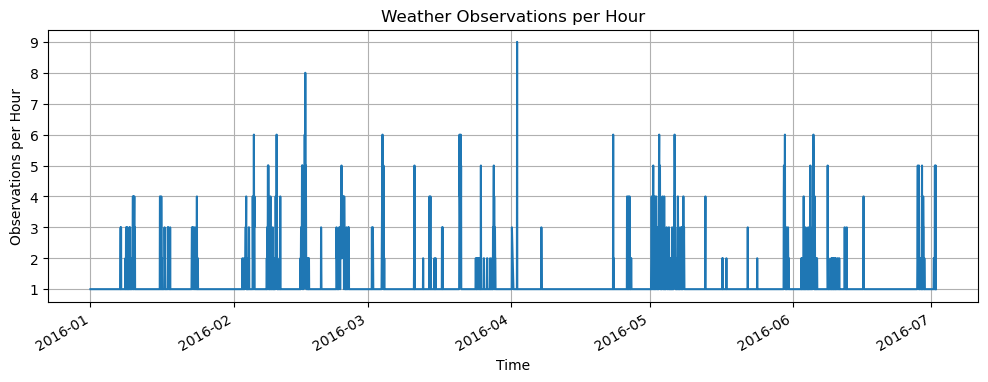

In [10]:
import matplotlib.pyplot as plt

# Plot time series frequency
plt.figure(figsize=(12, 4))
counts_per_hour.plot()
plt.title("Weather Observations per Hour")
plt.xlabel("Time")
plt.ylabel("Observations per Hour")
plt.grid(True)
plt.show()

The timestamps are predominantly distributed hourly, with slight fluctuations.
There are some dips in frequency; potentially missing hours.
The data does not appear to be exactly on the hour (e.g. xx:51).

### Check minute distribution

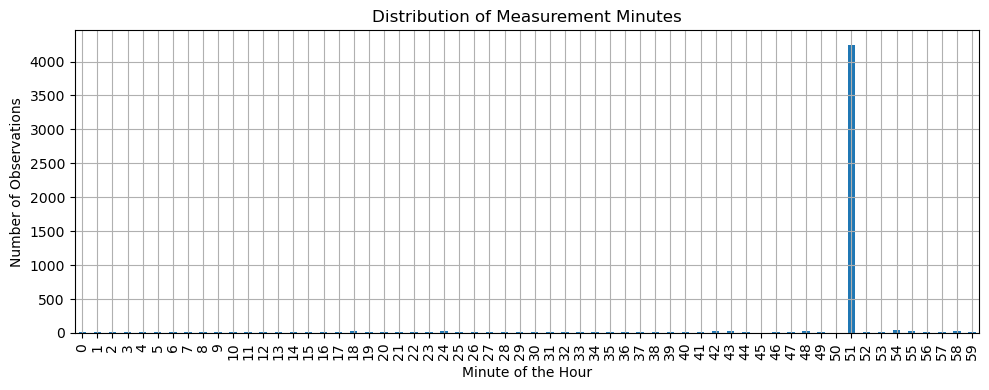

In [11]:
# Extract minute component from timestamp
weather['minute'] = weather['datetime'].dt.minute

# Count how many records fall into each minute of the hour
minute_distribution = weather['minute'].value_counts().sort_index()

# Plot the distribution of measurement minutes
plt.figure(figsize=(10, 4))
minute_distribution.plot(kind='bar')
plt.title("Distribution of Measurement Minutes")
plt.xlabel("Minute of the Hour")
plt.ylabel("Number of Observations")
plt.grid(True)
plt.tight_layout()
plt.show()

Findings

Minute 51 is by far the most frequent minute of measurement (over 4000 entries).
All other minutes are rare or sporadic → probably exceptions, manual additions or other sources.

### Check duplicates

Analysis target
- “Are there duplicate timestamps after filtering for minute == 51?”
- Important for: clean aggregation, uniqueness when merging with other data records (e.g.
cab data per hour).

In [12]:
# Filter for rows measured at minute 51
weather_51 = weather[weather['minute'] == 51].copy()

# Count duplicated timestamps after filtering
duplicate_timestamps = weather_51['datetime'].duplicated().sum()

# Display all duplicated timestamp rows if any
duplicated_rows = weather_51[weather_51['datetime'].duplicated(keep=False)]

duplicate_timestamps, duplicated_rows.sort_values('datetime')

(np.int64(1),
                 timestamp  temp  windspeed  humidity  precip  pressure  \
 2092  2016-03-13 00:51:00  52.0        6.9      59.0     0.0     30.00   
 2093  2016-03-13 00:51:00  50.0        5.8      54.0     0.0     30.13   
 
       conditions dailyprecip dailysnow  fog  rain  snow            datetime  \
 2092       Clear           T      0.00    0     0     0 2016-03-13 00:51:00   
 2093  Light Rain           T      0.00    0     1     0 2016-03-13 00:51:00   
 
      date_time_hour  minute  
 2092     2016-03-13      51  
 2093     2016-03-13      51  )

Findings

Exactly one timestamp is duplicated: 2016-03-13 00:51:00
	Two different entries (Clear vs. Light Rain), probably two weather sources or measurements.



### Aggregate weather data meaningfully on an hourly basis

Analysis goal (question)

Goal: clean and unambiguous representation per hour, ready for feature engineering and merging with other data sets.

Notes

“T” stands for ‘Trace’, i.e. an unmeasurable but present amount of precipitation -
typically less than 0.005 inch. Will be transformed into 0.001

In [13]:
# Convert daily precipitation/snow to numeric
weather_51['dailyprecip'] = weather_51['dailyprecip'].replace('T', 0.001).astype(float)
weather_51['dailysnow'] = weather_51['dailysnow'].replace('T', 0.001).astype(float)

# Aggregate to hourly level using mean for continuous values, max for binary flags
weather_date_time_hour = (
  weather_51.groupby('date_time_hour')
  .agg({
    'temp': 'mean',
    'windspeed': 'mean',
    'humidity': 'mean',
    'precip': 'sum',
    'pressure': 'mean',
    'dailyprecip': 'first',  # same within a day
    'dailysnow': 'first',
    'fog': 'max',
    'rain': 'max',
    'snow': 'max',
    'conditions': lambda x: x.mode().iloc[0] if not x.mode().empty else x.iloc[0]  # most frequent
  })
  .reset_index()
)
weather_date_time_hour.head()

,date_time_hour,temp,windspeed,humidity,precip,pressure,dailyprecip,dailysnow,fog,rain,snow,conditions
0,2016-01-01 00:00:00,42.1,4.6,51.0,0.0,30.06,0.0,0.0,0,0,0,Overcast
1,2016-01-01 01:00:00,41.0,3.5,53.0,0.0,30.06,0.0,0.0,0,0,0,Overcast
2,2016-01-01 02:00:00,41.0,4.6,55.0,0.0,30.06,0.0,0.0,0,0,0,Overcast
3,2016-01-01 03:00:00,41.0,9.2,55.0,0.0,30.06,0.0,0.0,0,0,0,Overcast
4,2016-01-01 04:00:00,39.9,10.4,58.0,0.0,30.04,0.0,0.0,0,0,0,Overcast


Findings

All numerical weather data are now hourly averages
precip was totalized (for hourly total precipitation).
conditions has been adopted as the most frequent condition per Hour.
fog, rain, snow are binary indicators, summarized with max().

### Conversion of the units

- **temp** (Fahrenheit) to temp_C
- **windspeed** (mph) to windspeed_Kph
- **precip** (inches) to precip_mm
- **pressure** (mbar) to pressure_Pa
- dailyprecip (inches) to dailyprecip_mm
- dailysnow (inches) to dailysnow_mm

In [14]:
weather_date_time_hour['temp_C'] = (weather_date_time_hour['temp'] - 32) * 5 / 9
weather_date_time_hour['precip_mm'] = weather_date_time_hour['precip'] * 25.4
weather_date_time_hour['dailyprecip_mm'] = weather_date_time_hour['dailyprecip'] * 25.4
weather_date_time_hour['dailysnow_mm'] = weather_date_time_hour['dailysnow'] * 25.4
weather_date_time_hour['windspeed_kph'] = weather_date_time_hour['windspeed'] * 1.60934
weather_date_time_hour['pressure_hPa'] = weather_date_time_hour['pressure'] * 33.8639

weather_date_time_hour.drop(['temp', 'precip', 'dailyprecip', 'dailysnow', 'windspeed', 'pressure'],
                            axis=1,
                            inplace=True)

In [15]:
weather_date_time_hour

,date_time_hour,humidity,fog,rain,snow,conditions,temp_C,precip_mm,dailyprecip_mm,dailysnow_mm,windspeed_kph,pressure_hPa
0,2016-01-01 00:00:00,51.0,0,0,0,Overcast,5.611111,0.000,0.000,0.0,7.402964,1017.948834
1,2016-01-01 01:00:00,53.0,0,0,0,Overcast,5.000000,0.000,0.000,0.0,5.632690,1017.948834
2,2016-01-01 02:00:00,55.0,0,0,0,Overcast,5.000000,0.000,0.000,0.0,7.402964,1017.948834
3,2016-01-01 03:00:00,55.0,0,0,0,Overcast,5.000000,0.000,0.000,0.0,14.805928,1017.948834
4,2016-01-01 04:00:00,58.0,0,0,0,Overcast,4.388889,0.000,0.000,0.0,16.737136,1017.271556
...,...,...,...,...,...,...,...,...,...,...,...,...
4241,2016-07-01 19:00:00,90.0,0,0,0,Clear,21.722222,0.000,21.082,0.0,7.402964,1011.853332
4242,2016-07-01 20:00:00,93.0,0,0,0,Partly Cloudy,21.111111,0.000,21.082,0.0,NaN,1011.176054
4243,2016-07-01 21:00:00,93.0,0,0,0,Overcast,20.611111,0.000,21.082,0.0,5.632690,1012.191971
4244,2016-07-01 22:00:00,93.0,0,0,0,Scattered Clouds,19.388889,11.176,21.082,0.0,5.632690,1011.853332


Erkenntnisse

Overall it looks good

### Exploration

#### windspeed_kph

Objective of the Exploration

Assess the distribution and plausibility of wind speed (converted to km/h). Identify potential measurement artifacts or unusual spikes.

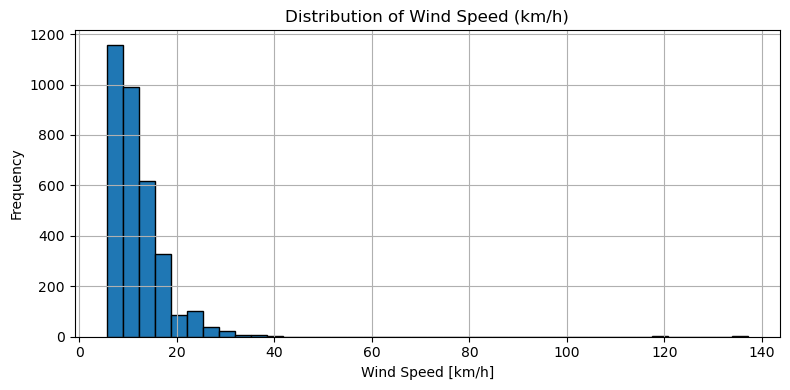

count    3357.000000
mean       11.426578
std         5.987670
min         5.632690
25%         7.402964
50%         9.334172
75%        14.805928
max       137.115768
Name: windspeed_kph, dtype: float64

In [16]:
plt.figure(figsize=(8, 4))
weather_date_time_hour['windspeed_kph'].plot.hist(bins=40, edgecolor='black')
plt.title("Distribution of Wind Speed (km/h)")
plt.xlabel("Wind Speed [km/h]")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

weather_date_time_hour['windspeed_kph'].describe()

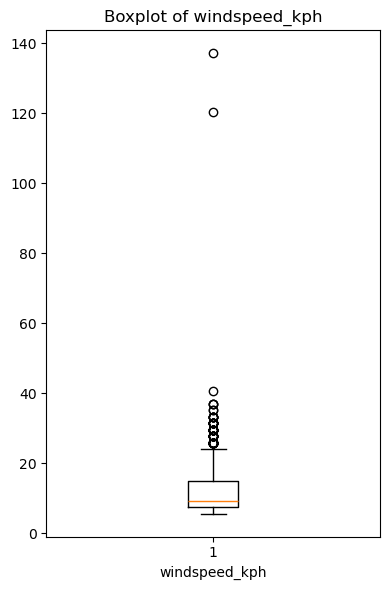

In [36]:
plt.figure(figsize=(4, 6))
plt.boxplot(weather_date_time_hour["windspeed_kph"].dropna())
plt.title(f"Boxplot of windspeed_kph")
plt.xlabel("windspeed_kph")
plt.tight_layout()
plt.show()

Findings of the Exploration

- Most values lie between 5 and 25 km/h, which is typical for city-level weather.
- One extremely high value (137.12 km/h) may be an outlier.
- The variable appears well-behaved and usable without further transformation.


Required Arrangements

- Capping: Consider capping or removing windspeed values above ~60 km/h if robustness is required.

#### temp_C

Objective of the Exploration
- Understand the distribution and plausibility of air temperature in degrees Celsius (temp_C). 
Detect potential sensor errors or environmental outliers.

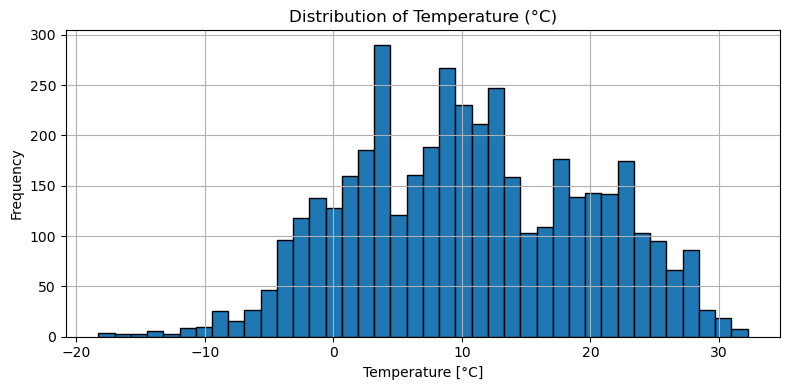

count    4246.000000
mean       10.631954
std         9.233852
min       -18.277778
25%         3.277778
50%        10.000000
75%        17.777778
max        32.222222
Name: temp_C, dtype: float64

In [17]:
plt.figure(figsize=(8, 4))
weather_date_time_hour['temp_C'].plot.hist(bins=40, edgecolor='black')
plt.title("Distribution of Temperature (°C)")
plt.xlabel("Temperature [°C]")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

weather_date_time_hour['temp_C'].describe()

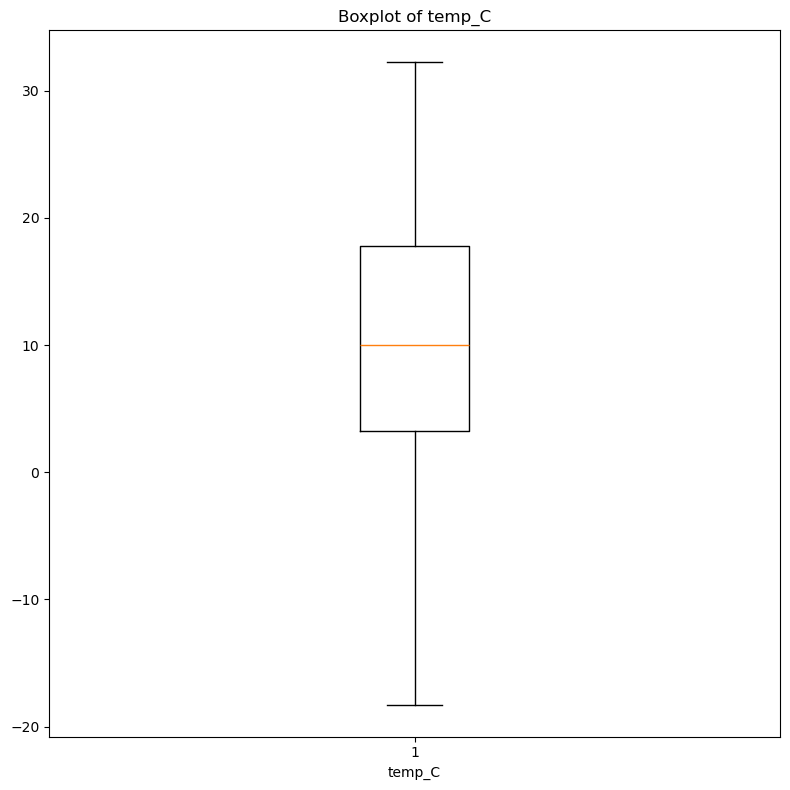

In [39]:
plt.figure(figsize=(4, 6))
plt.boxplot(weather_date_time_hour["temp_C"].dropna())
plt.title(f"Boxplot of temp_C")
plt.xlabel("temp_C")
plt.tight_layout()
plt.show()

Findings of the Exploration
- The values range from −18.28°C to +32.22°C, which is realistic for NYC winter and spring.
- The distribution is unimodal, centered around 10°C.
- No visible outliers or data quality issues.

Required Arrangements
- None. The variable temp_C can be used directly as a numerical feature.



### pressure_hPa

Objective of the Exploration
- Evaluate the atmospheric pressure values (in hPa) to identify errors or unusual patterns.

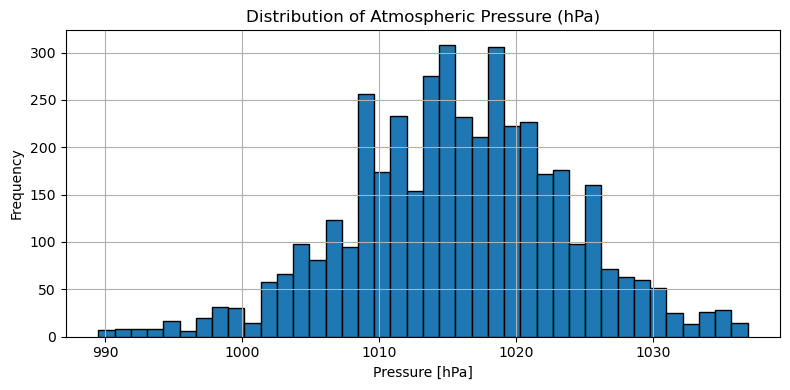

count    4226.000000
mean     1015.708376
std         7.919862
min       989.503158
25%      1010.160137
50%      1015.917000
75%      1020.657946
max      1036.912618
Name: pressure_hPa, dtype: float64

In [18]:
plt.figure(figsize=(8, 4))
weather_date_time_hour['pressure_hPa'].plot.hist(bins=40, edgecolor='black')
plt.title("Distribution of Atmospheric Pressure (hPa)")
plt.xlabel("Pressure [hPa]")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

weather_date_time_hour['pressure_hPa'].describe()

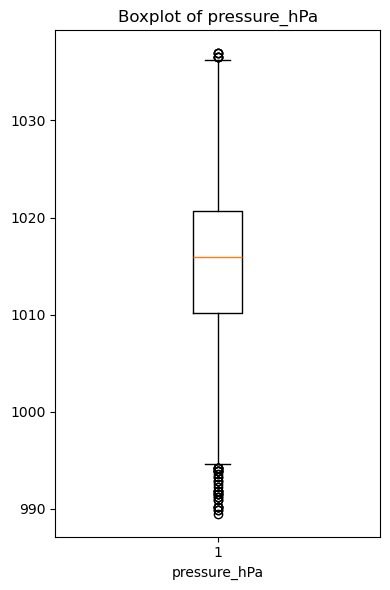

In [40]:
plt.figure(figsize=(4, 6))
plt.boxplot(weather_date_time_hour["pressure_hPa"].dropna())
plt.title(f"Boxplot of pressure_hPa")
plt.xlabel("pressure_hPa")
plt.tight_layout()
plt.show()


Findings of the Exploration
- The range is between 989.5 and 1036.9 hPa, which is expected for surface pressure.
- The distribution is centered around 1016 hPa.

Required Arrangements
- None.



### humidity

Objective of the Exploration

Check humidity distribution (in %) for plausibility and identify measurement errors.

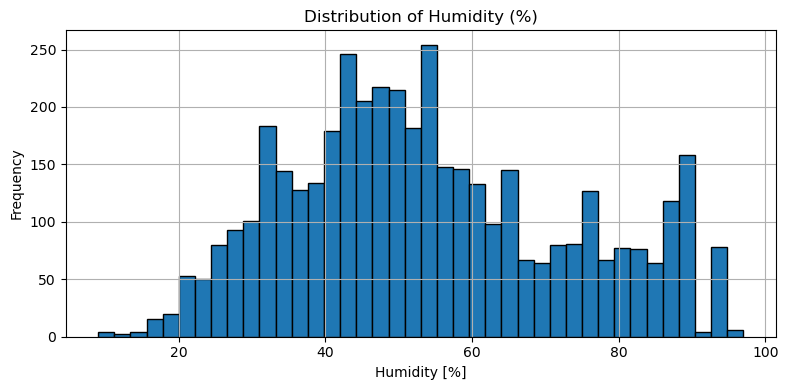

count    4246.000000
mean       53.924753
std        18.900061
min         9.000000
25%        40.000000
50%        51.000000
75%        67.000000
max        97.000000
Name: humidity, dtype: float64

In [21]:
plt.figure(figsize=(8, 4))
weather_date_time_hour['humidity'].plot.hist(bins=40, edgecolor='black')
plt.title("Distribution of Humidity (%)")
plt.xlabel("Humidity [%]")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

weather_date_time_hour['humidity'].describe()

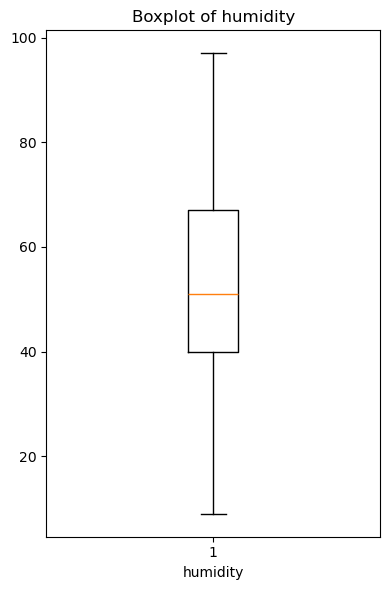

In [41]:
plt.figure(figsize=(4, 6))
plt.boxplot(weather_date_time_hour["humidity"].dropna())
plt.title(f"Boxplot of humidity")
plt.xlabel("humidity")
plt.tight_layout()
plt.show()


Findings of the Exploration
- Values range from 9% to 97%.
- Most values lie between 40% and 70%.
- No anomalies or unrealistic entries.

Required Arrangements
- None.



### precip_mm

Objective of the Exploration
- Investigate hourly precipitation in millimeters to identify rain events and potential spikes.

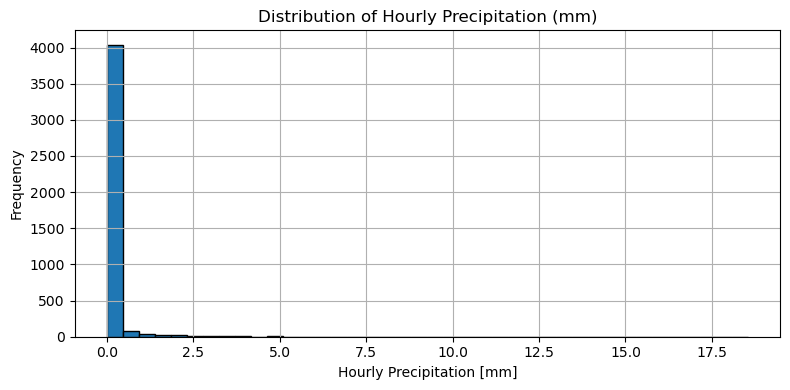

count    4246.000000
mean        0.111327
std         0.731973
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        18.542000
Name: precip_mm, dtype: float64

In [22]:
plt.figure(figsize=(8, 4))
weather_date_time_hour['precip_mm'].plot.hist(bins=40, edgecolor='black')
plt.title("Distribution of Hourly Precipitation (mm)")
plt.xlabel("Hourly Precipitation [mm]")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

weather_date_time_hour['precip_mm'].describe()

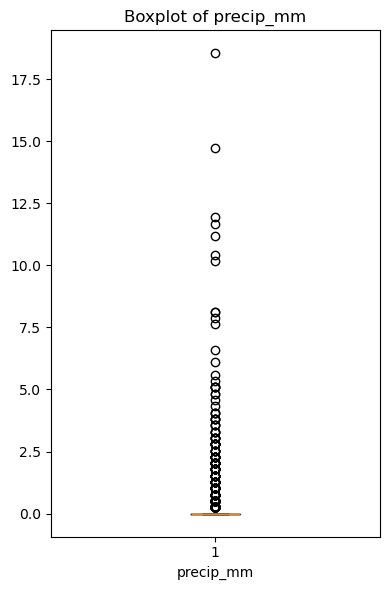

In [42]:
plt.figure(figsize=(4, 6))
plt.boxplot(weather_date_time_hour["precip_mm"].dropna())
plt.title(f"Boxplot of precip_mm")
plt.xlabel("precip_mm")
plt.tight_layout()
plt.show()

Findings of the Exploration
- Most values are 0.0 (dry hours).
- Occasional rain events up to 18.5 mm.

Required Arrangements
- None. Consider binary flag creation (e.g. had_rain = precip_mm > 0).

### dailyprecip_mm

Objective of the Exploration
- Review daily total precipitation to understand the weather intensity on a daily scale.

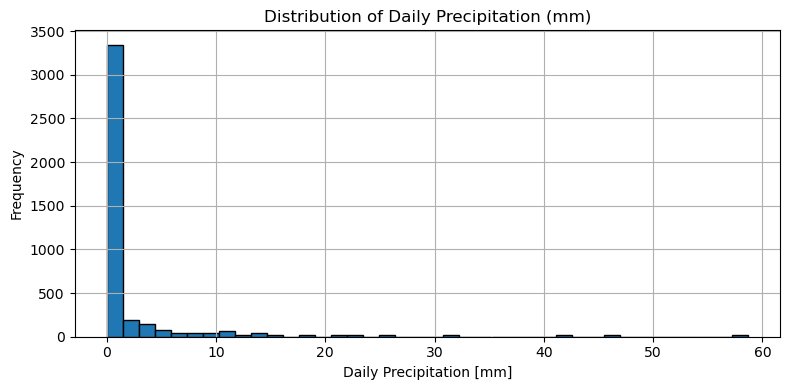

count    4246.000000
mean        2.645303
std         7.782427
min         0.000000
25%         0.000000
50%         0.000000
75%         1.016000
max        58.674000
Name: dailyprecip_mm, dtype: float64

In [23]:
plt.figure(figsize=(8, 4))
weather_date_time_hour['dailyprecip_mm'].plot.hist(bins=40, edgecolor='black')
plt.title("Distribution of Daily Precipitation (mm)")
plt.xlabel("Daily Precipitation [mm]")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

weather_date_time_hour['dailyprecip_mm'].describe()

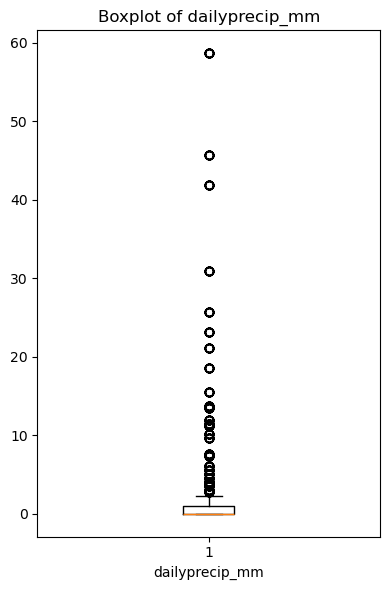

In [43]:
plt.figure(figsize=(4, 6))
plt.boxplot(weather_date_time_hour["dailyprecip_mm"].dropna())
plt.title(f"Boxplot of dailyprecip_mm")
plt.xlabel("dailyprecip_mm")
plt.tight_layout()
plt.show()


Findings of the Exploration
- Most values are 0.0 (dry days).
- Some days exceed 10 mm, maximum is 58.7 mm.
- Values are plausible for NYC climate.

Required Arrangements
- None.

### dailysnow_mm

Objective of the Exploration
- Check daily snow accumulation to assess plausibility and spot potential errors.


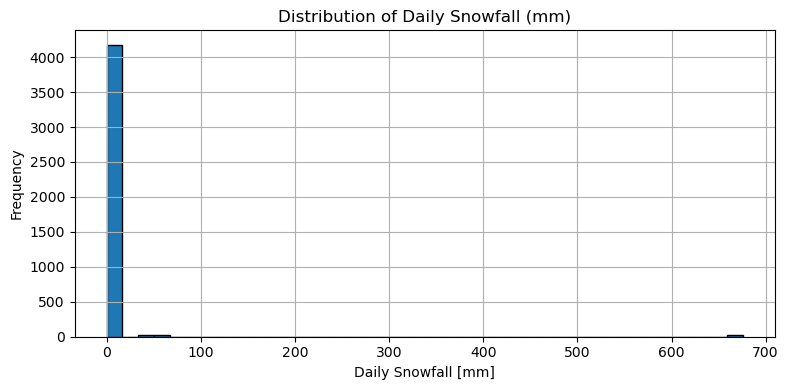

count    4246.000000
mean        4.599548
std        50.907600
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       675.640000
Name: dailysnow_mm, dtype: float64

In [24]:
plt.figure(figsize=(8, 4))
weather_date_time_hour['dailysnow_mm'].plot.hist(bins=40, edgecolor='black')
plt.title("Distribution of Daily Snowfall (mm)")
plt.xlabel("Daily Snowfall [mm]")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

weather_date_time_hour['dailysnow_mm'].describe()

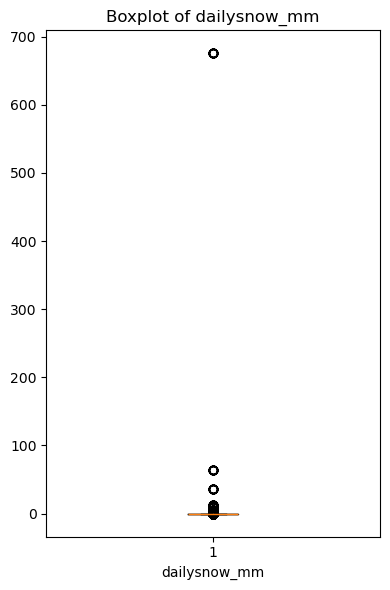

In [44]:
plt.figure(figsize=(4, 6))
plt.boxplot(weather_date_time_hour["dailysnow_mm"].dropna())
plt.title(f"Boxplot of dailysnow_mm")
plt.xlabel("dailysnow_mm")
plt.tight_layout()
plt.show()


Findings of the Exploration
- Most days have no snow.
- Some heavy snowfall days (>100 mm), up to 675 mm, which is likely an error.
- Mean and median are both close to 0.

Required Arrangements
- Consider capping or validating values >200 mm, as they may be incorrect.

### Distribution of Weather Conditions

Objective of the Exploration
- Assess the distribution of reported weather conditions. Identify dominant classes and rare or
ambiguous values that may require grouping or recoding.

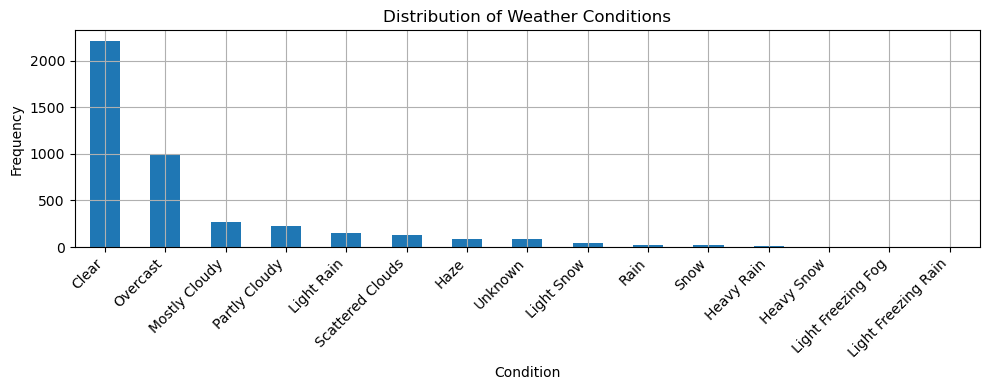

conditions
Clear                  2215
Overcast               1000
Mostly Cloudy           264
Partly Cloudy           223
Light Rain              148
Scattered Clouds        125
Haze                     85
Unknown                  83
Light Snow               40
Rain                     23
Snow                     23
Heavy Rain               10
Heavy Snow                5
Light Freezing Fog        1
Light Freezing Rain       1
Name: count, dtype: int64

In [25]:
condition_counts = weather_date_time_hour['conditions'].value_counts()

plt.figure(figsize=(10, 4))
condition_counts.plot(kind='bar')
plt.title("Distribution of Weather Conditions")
plt.xlabel("Condition")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

condition_counts

Findings of the Exploration
- Most common condition is Clear (2215 times), followed by Overcast (1000).
- Some conditions occur only a few times, e.g., Heavy Snow, Light Freezing Fog.
- Unknown appears 83 times and may indicate missing or invalid sensor data.

Considered Arrangements
- Combining rare categories into a common label (e.g., Other).
- Removing or flagging rows with Unknown for modeling.
- Optionally creating binary indicators for high-impact states (e.g., is_rain, is_snow).
